In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
def read_sample_data():
    return pd.read_csv('sample_traffic_data.csv', index_col=False)

    
def draw_sample_bitrate_over_time(source_node = -1, destination_node = -1, figsize=(15, 5)):
    """
    draws sample bitrate file for a chosen pair of nodes, use -1 for no filtering
    """
    sample_data = read_sample_data()
    if(source_node == -1 and destination_node == -1):
        datarates = sample_data['datarate']
        start_times = sample_data['arrival_time']
        end_times = sample_data['departure_time']
    elif(source_node == -1):
        datarates = sample_data.loc[sample_data['destination_id'] == destination_node]['datarate']
        start_times = sample_data.loc[sample_data['destination_id'] == destination_node]['arrival_time']
        end_times = sample_data.loc[sample_data['destination_id'] == destination_node]['departure_time']
    elif(destination_node == -1):
        datarates = sample_data.loc[sample_data['source_id'] == source_node]['datarate']
        start_times = sample_data.loc[sample_data['source_id'] == source_node]['arrival_time']
        end_times = sample_data.loc[sample_data['source_id'] == source_node]['departure_time']
    else:
        datarates = sample_data.loc[(sample_data['source_id'] == source_node) & (sample_data['destination_id'] == destination_node)]['datarate']
        start_times = sample_data.loc[(sample_data['source_id'] == source_node) & (sample_data['destination_id'] == destination_node)]['arrival_time']
        end_times = sample_data.loc[(sample_data['source_id'] == source_node) & (sample_data['destination_id'] == destination_node)]['departure_time']

    if(datarates.empty):
        print('wrong source or destination node')
    else:    
        test = pd.DataFrame([datarates,start_times,end_times]).transpose()
        values = list(test.itertuples(index=False, name=None))

        sorted_values = sorted(values, key=lambda x: (x[1], x[2]))
        time_points = []
        sums = []
        values = []
        current_sum = 0
        end_times = []
        for value, start_time, end_time in sorted_values:
            time_points.append(start_time)
            values.append(value)
            time_points.append(end_time)
            values.append(-value)

        time_points, values = zip(*sorted(zip(time_points, values)))

        for i in range(len(time_points)):
            current_sum +=values[i]
            sums.append(current_sum)

        plt.figure(figsize=figsize)
        plt.step(time_points, sums)
        plt.xlabel('time')
        plt.ylabel('bitrate')
        plt.xticks(np.arange(0,31))
        if(source_node == -1):
            source_node = 'all'
        if(destination_node == -1):
            destination_node = 'all'    
        plt.title('bitrate over time, from {} to {}'.format(source_node, destination_node))
        plt.tight_layout()
        plt.show()


def draw_sample_data_duration_histogram(nbins=200, figsize=(10,5)):
    sample_data = read_sample_data()
    sample_data['duration'] = sample_data['departure_time'] - sample_data['arrival_time']

    plt.figure(figsize=figsize)
    plt.hist(sample_data['duration'], bins=nbins)
    plt.title('request duration histogram')
    plt.xlabel('request duration in days')
    plt.ylabel('request count')
    plt.tight_layout()
    plt.show()


def read_seattle_data(aggregation='avg'):
    """
    reads the files with Seattle data; 
    aggregation types: 'avg' and 'max'
    """
    if(aggregation == 'avg'):
        six_daily_avg = pd.read_csv('agg_avg_daily.txt', sep='\t')
        six_daily_avg = six_daily_avg.drop(columns='Epoch Seconds')
        six_daily_avg = six_daily_avg.rename(columns={"YYYY-MM-DD UTC": "date", "Average aggregate bits per second": "bitrate"})
        six_daily_avg = six_daily_avg.set_index('date')
        six_daily_avg.index = pd.to_datetime(six_daily_avg.index)
        six_daily_avg = six_daily_avg.asfreq('d')
        return six_daily_avg

    if(aggregation == 'max'):
        six_daily_max = pd.read_csv('agg_max_daily.txt', sep='\t')
        six_daily_max = six_daily_max.drop(columns='Epoch Seconds')
        six_daily_max = six_daily_max.rename(columns={"YYYY-MM-DD UTC": "date", "Maximum aggregate bits per second": "bitrate"})
        six_daily_max = six_daily_max.set_index('date')
        six_daily_max.index = pd.to_datetime(six_daily_max.index)
        six_daily_max = six_daily_max.asfreq('d')
        return six_daily_max
    
    else:
        print('unknown aggregation')
        return pd.DataFrame([])


def draw_seattle_year_month_by_month(year=2022, aggregation='max', figsize=(18,6)):
    """
    draws Seattle data month by month for a chosen year and aggregation type, with reset indexes; 
    aggregation types: 'avg' and 'max'
    """
    datasource = read_seattle_data(aggregation)
    year=year
    
    if(datasource.empty != True):
        plt.figure(figsize=figsize)
        plt.plot(datasource['{}-01-01'.format(year):'{}-01-31'.format(year)].reset_index(drop=True), label='jan', linestyle='solid',  color='navy')
        plt.plot(datasource['{}-02-01'.format(year):'{}-02-28'.format(year)].reset_index(drop=True), label='feb', linestyle='dashed',  color='dodgerblue')
        plt.plot(datasource['{}-03-01'.format(year):'{}-03-31'.format(year)].reset_index(drop=True), label='mar', linestyle='solid',  color='mediumturquoise')
        plt.plot(datasource['{}-04-01'.format(year):'{}-04-30'.format(year)].reset_index(drop=True), label='apr', linestyle='dashed',  color='yellowgreen')
        plt.plot(datasource['{}-05-01'.format(year):'{}-05-31'.format(year)].reset_index(drop=True), label='may', linestyle='solid',  color='forestgreen')
        plt.plot(datasource['{}-06-01'.format(year):'{}-06-30'.format(year)].reset_index(drop=True), label='jun', linestyle='dashed',  color='gold')
        plt.plot(datasource['{}-07-01'.format(year):'{}-07-31'.format(year)].reset_index(drop=True), label='jul', linestyle='solid',  color='darkorange')
        plt.plot(datasource['{}-08-01'.format(year):'{}-08-31'.format(year)].reset_index(drop=True), label='aug', linestyle='dashed',  color='darkgoldenrod')
        plt.plot(datasource['{}-09-01'.format(year):'{}-09-30'.format(year)].reset_index(drop=True), label='sep', linestyle='solid',  color='chocolate')
        plt.plot(datasource['{}-10-01'.format(year):'{}-10-31'.format(year)].reset_index(drop=True), label='oct', linestyle='dashed',  color='firebrick')
        plt.plot(datasource['{}-11-01'.format(year):'{}-11-30'.format(year)].reset_index(drop=True), label='nov', linestyle='solid',  color='maroon')
        plt.plot(datasource['{}-12-01'.format(year):'{}-12-31'.format(year)].reset_index(drop=True), label='dec', linestyle='dashed',  color='dimgray')
        plt.xlabel('day of the month')
        plt.ylabel('bitrate')
        plt.legend()
        plt.title('Seattle {}, {}'.format(year,aggregation))
        plt.tight_layout()
        plt.show()   


def draw_seattle_avg_and_max(from_date=0, ylog=True, figsize=(15,7), weekly_resampling=False):
    """
    draws Seatlle traffic from specified date formatted as 'yyyy-mm-dd' (or from the beginning if 0);
    aggregation types: 'avg' and 'max', ylog: use logaritmic yaxis
    """
    six_daily_avg = read_seattle_data('avg')
    six_daily_max = read_seattle_data('max')
    if(weekly_resampling):
            six_daily_avg = six_daily_avg.resample('7d').max()
            six_daily_max = six_daily_max.resample('7d').max()
    from_date = from_date
    plt.figure(figsize=figsize)
    plt.plot(six_daily_max[from_date:], label='max', color='teal')
    plt.plot(six_daily_avg[from_date:], label='avg', color='darkmagenta')
    plt.xlabel('time')
    plt.ylabel('bitrate')
    plt.legend()
    if(ylog):
        plt.yscale('log')
    plt.title('Seattle bitrate over time')
    plt.tight_layout()
    plt.show()   


def draw_seattle_year_by_year(aggregation='avg', ylog=False, figsize=(18,6), weekly_resampling=False):
    """
    draws Seatlle traffic for the last 10 years with reset indexes;
    aggregation types: 'avg' and 'max', ylog: use logaritmic yaxis
    """
    if(aggregation != 'avg' and aggregation != 'max'):
        print('unknown aggregation')
    else:    
        plt.figure(figsize=figsize)
        six_daily_avg = read_seattle_data(aggregation)
        if(weekly_resampling):
            six_daily_avg = six_daily_avg.resample('7d').max()
        plt.plot(six_daily_avg['2023-01-01':'2024-01-01'].reset_index(drop=True), label='2023')
        plt.plot(six_daily_avg['2022-01-01':'2023-01-01'].reset_index(drop=True), label='2022')
        plt.plot(six_daily_avg['2021-01-01':'2022-01-01'].reset_index(drop=True), label='2021')
        plt.plot(six_daily_avg['2020-01-01':'2021-01-01'].reset_index(drop=True), label='2020')
        plt.plot(six_daily_avg['2019-01-01':'2020-01-01'].reset_index(drop=True), label='2019')
        plt.plot(six_daily_avg['2018-01-01':'2019-01-01'].reset_index(drop=True), label='2018')
        plt.plot(six_daily_avg['2017-01-01':'2018-01-01'].reset_index(drop=True), label='2017')
        plt.plot(six_daily_avg['2016-01-01':'2017-01-01'].reset_index(drop=True), label='2016')
        plt.plot(six_daily_avg['2015-01-01':'2016-01-01'].reset_index(drop=True), label='2015')
        plt.plot(six_daily_avg['2014-01-01':'2015-01-01'].reset_index(drop=True), label='2014')
        plt.plot(six_daily_avg['2013-01-01':'2014-01-01'].reset_index(drop=True), label='2013')
        plt.plot(six_daily_avg['2012-01-01':'2013-01-01'].reset_index(drop=True), label='2012')

        plt.xlabel('Time')
        plt.ylabel('Bitrate')
        plt.legend()
        if(ylog):
            plt.yscale('log')
        plt.title('Seattle bitrate over time, {}'.format(aggregation))
        plt.tight_layout()
        plt.show()


def draw_seattle_cumsums(aggregation='avg', figsize=(18,6)):
    """
    draws cumsums for the last 10 years with reset indexes; 
    aggregation types: 'avg' and 'max'
    """
    if(aggregation != 'avg' and aggregation != 'max'):
        print('unknown aggregation')
    else:    
        plt.figure(figsize=figsize)
        six_daily_avg = read_seattle_data(aggregation)
        plt.plot(six_daily_avg['2023-01-01':'2024-01-01'].reset_index(drop=True).cumsum(), label='2023')
        plt.plot(six_daily_avg['2022-01-01':'2023-01-01'].reset_index(drop=True).cumsum(), label='2022')
        plt.plot(six_daily_avg['2021-01-01':'2022-01-01'].reset_index(drop=True).cumsum(), label='2021')
        plt.plot(six_daily_avg['2020-01-01':'2021-01-01'].reset_index(drop=True).cumsum(), label='2020')
        plt.plot(six_daily_avg['2019-01-01':'2020-01-01'].reset_index(drop=True).cumsum(), label='2019')
        plt.plot(six_daily_avg['2018-01-01':'2019-01-01'].reset_index(drop=True).cumsum(), label='2018')
        plt.plot(six_daily_avg['2017-01-01':'2018-01-01'].reset_index(drop=True).cumsum(), label='2017')
        plt.plot(six_daily_avg['2016-01-01':'2017-01-01'].reset_index(drop=True).cumsum(), label='2016')
        plt.plot(six_daily_avg['2015-01-01':'2016-01-01'].reset_index(drop=True).cumsum(), label='2015')
        plt.plot(six_daily_avg['2014-01-01':'2015-01-01'].reset_index(drop=True).cumsum(), label='2014')
        plt.plot(six_daily_avg['2013-01-01':'2014-01-01'].reset_index(drop=True).cumsum(), label='2013')
        plt.plot(six_daily_avg['2012-01-01':'2013-01-01'].reset_index(drop=True).cumsum(), label='2012')

        plt.xlabel('Time')
        plt.ylabel('Bitrate')
        plt.legend()
        plt.title('Seattle cumsums, {}'.format(aggregation))
        plt.tight_layout()
        plt.show()

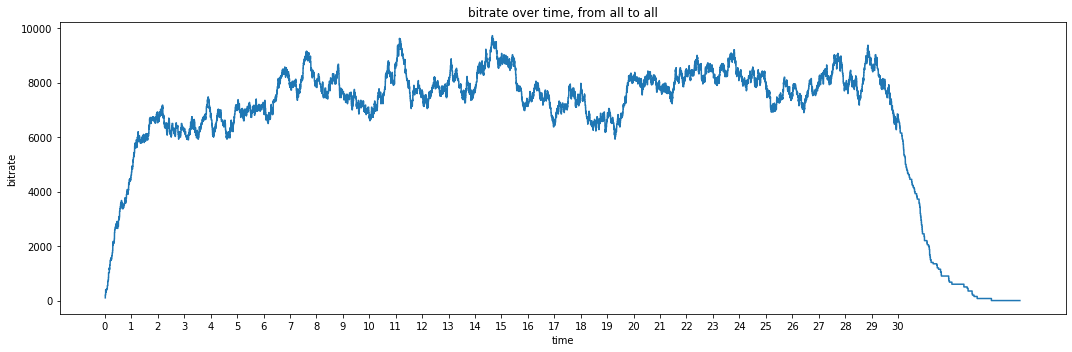

In [23]:
draw_sample_bitrate_over_time(source_node=-1, destination_node=-1)

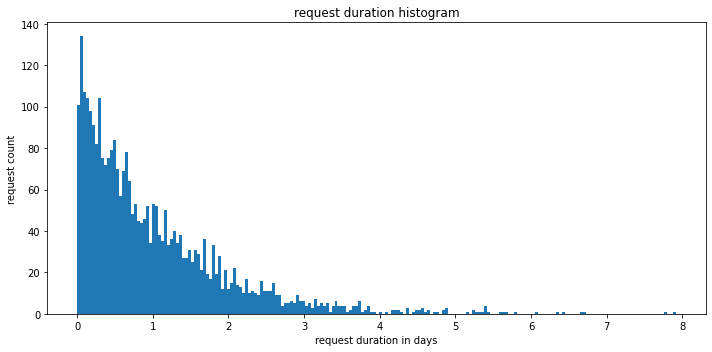

In [27]:
draw_sample_data_duration_histogram(nbins=200)

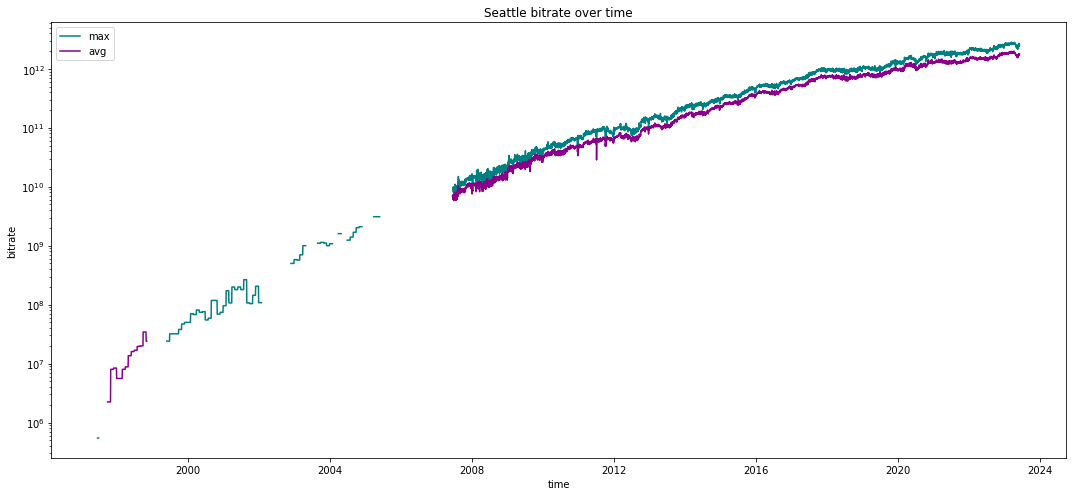

In [5]:
draw_seattle_avg_and_max(from_date=0,ylog=True)

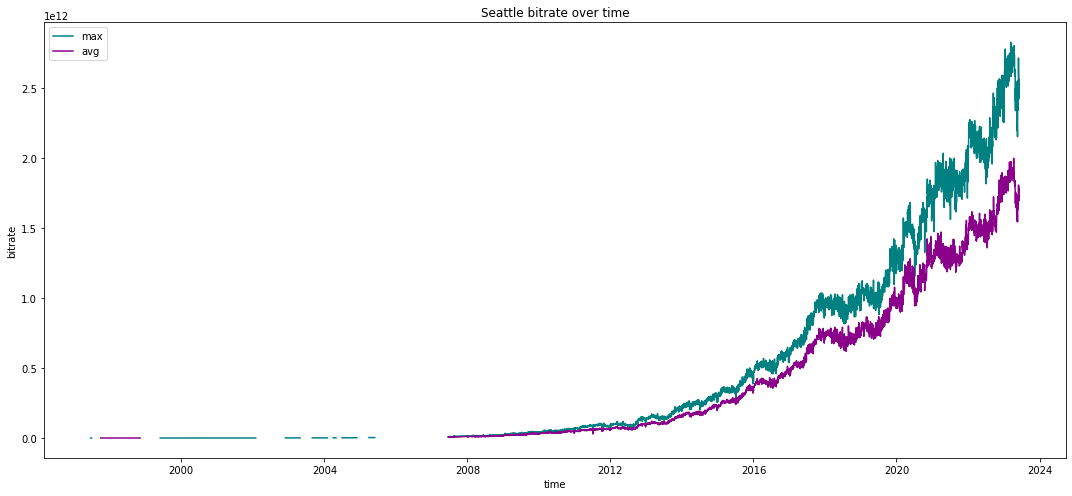

In [6]:
draw_seattle_avg_and_max(from_date=0,ylog=False)

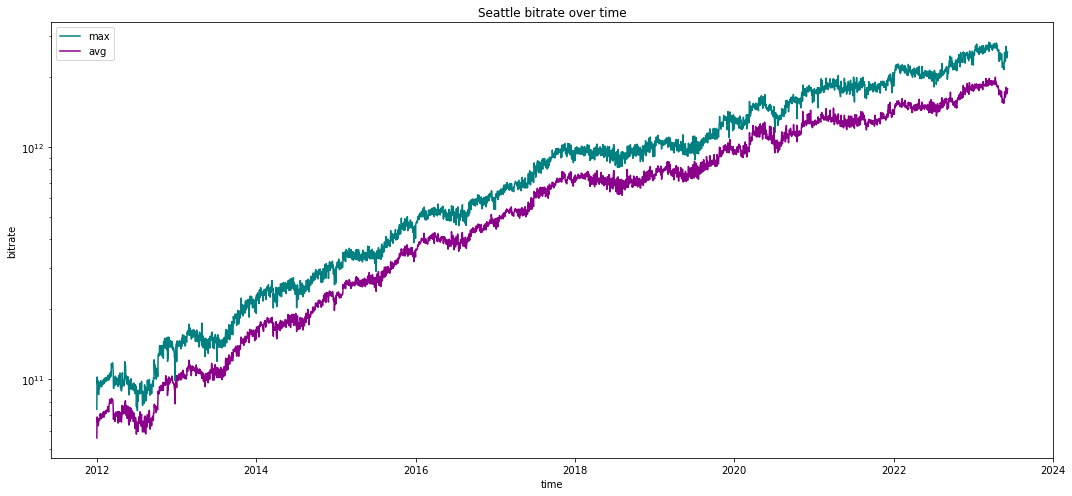

In [7]:
draw_seattle_avg_and_max(from_date='2012-01-01',ylog=True, weekly_resampling=False)

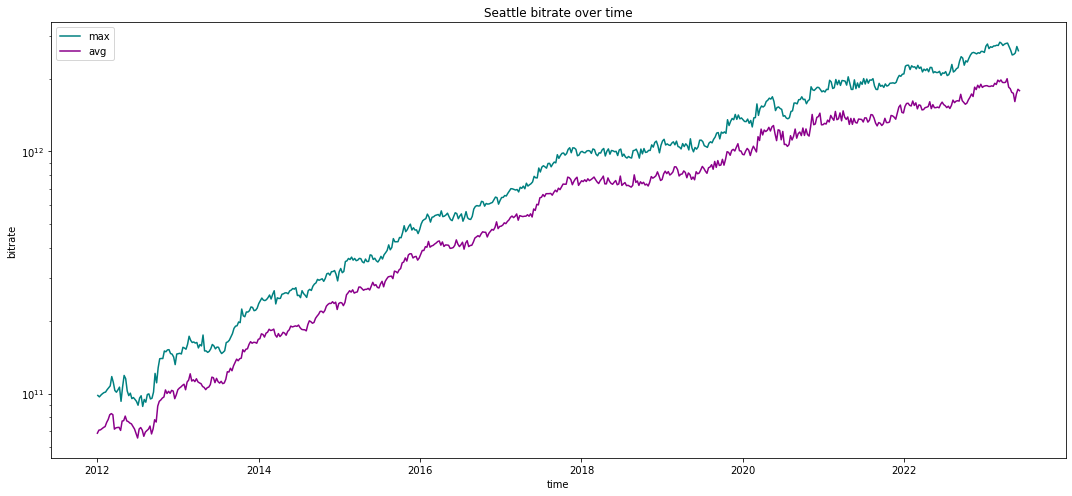

In [8]:
draw_seattle_avg_and_max(from_date='2012-01-01',ylog=True, weekly_resampling=True)

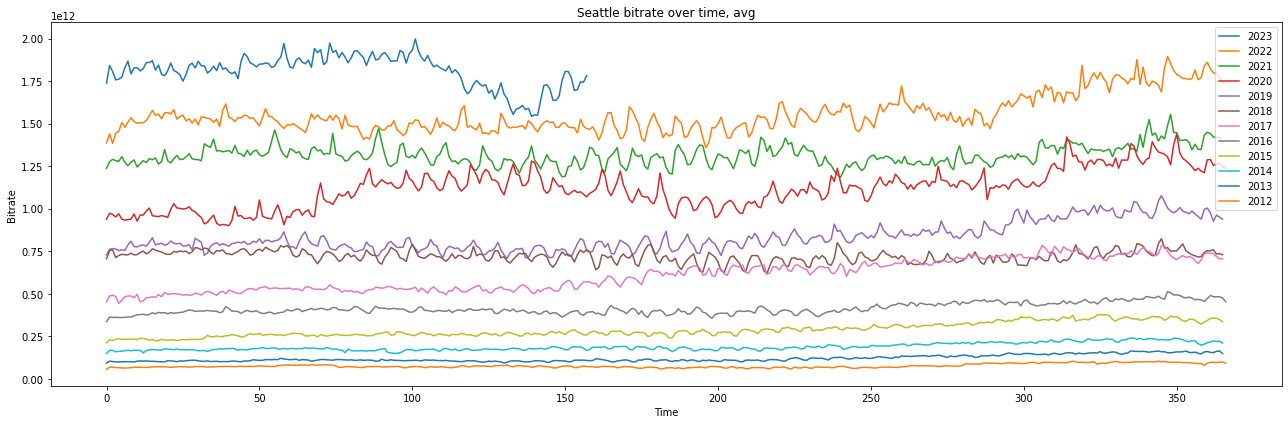

In [9]:
draw_seattle_year_by_year(aggregation='avg',weekly_resampling=False)

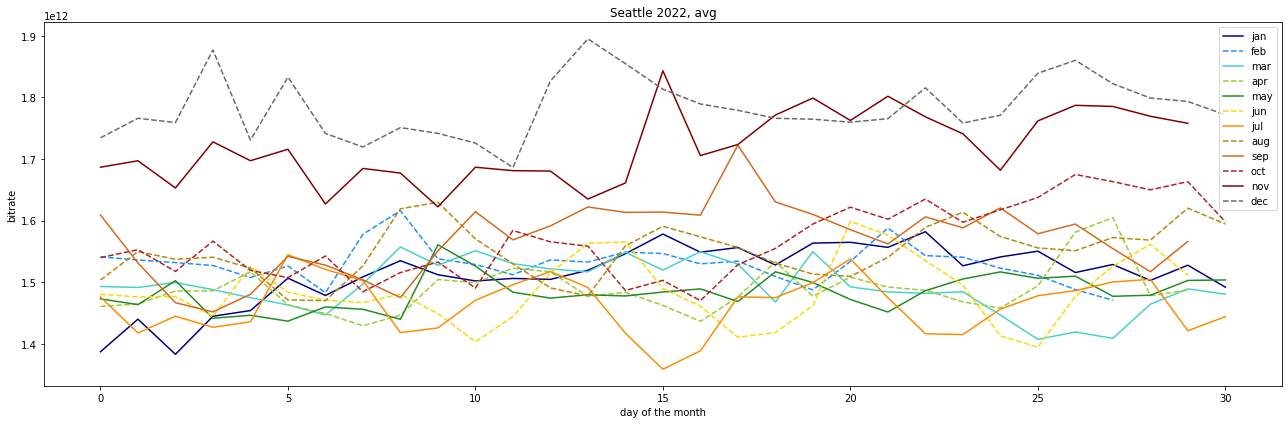

In [10]:
draw_seattle_year_month_by_month(year=2022,aggregation='avg')

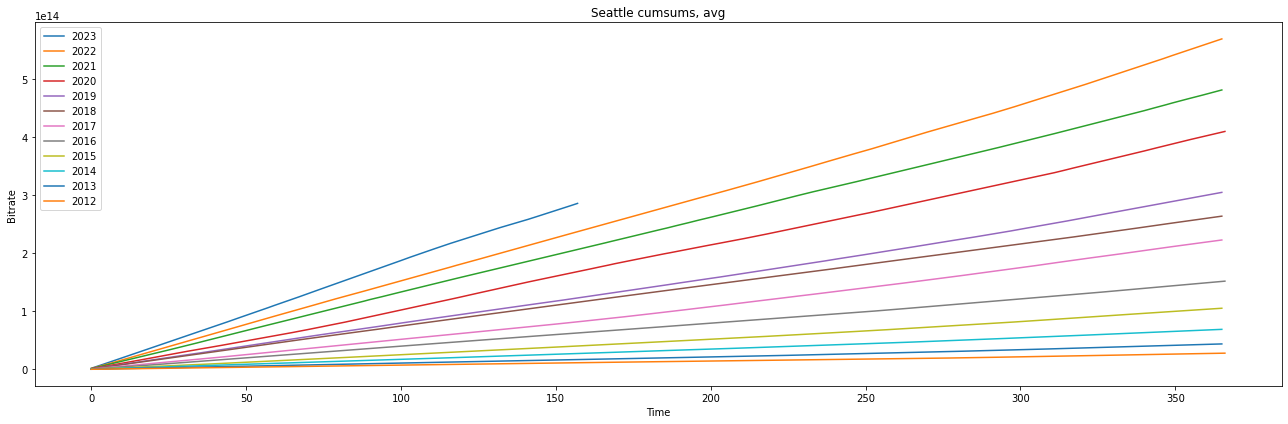

In [11]:
draw_seattle_cumsums(aggregation='avg')

<AxesSubplot:xlabel='date'>

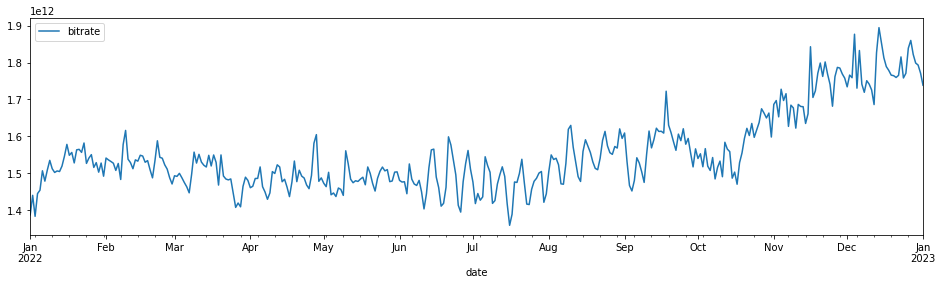

In [12]:
seattle_avg = read_seattle_data('avg')
seattle_avg = seattle_avg['2022-01-01':'2023-01-01']
seattle_avg.plot(figsize=(16,4))